# Imports and Defaults

In [180]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kmeans import KMeans
from kmedians import KMedians
from single_linkage import SingleLinkage
from spectral_clustering import SpectralClustering

In [363]:
%load_ext autoreload
%autoreload 2

sns.set_theme() # make plotting pretty

seed = 1 # numpy random number generator from seed
rng = np.random.default_rng(seed)

data_path = 'data' # realtive path to data directory
save_path = '../writeup/images'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Utility Functions

In [358]:
def gaussian_sample(dim, num_gaussians, means, widths, num_data_pts=1000, ax=None):
    # TODO: code currently ignores dimensions
    
    X = np.zeros(shape=(num_data_pts, 2))
    idx = rng.integers(low=0, high=num_gaussians, size=num_data_pts)
    _, counts = np.unique(idx, return_counts=True)
    
    # iterate over Gaussians
    for i in range(num_gaussians):
        # generate 2d Gaussian with parameters means[i] and widths[i]
        start, stop =  counts[:i].sum(), counts[:i+1].sum()
        X[start:stop] = rng.multivariate_normal(means[i], widths[i]*np.eye(2), size=(counts[i]))
        
        # plotting code
        if ax != None:
            ax.scatter(X[start:stop, 0], X[start:stop, 1], label=f'Cluster {i}')
    if ax!= None:
        ax.scatter(means[:, 0], means[:, 1], c='r', edgecolors='black', label='Means')
        ax.legend()
    return X

def euclidean_dist(u,v):
    return np.power(np.power(u - v, 2).sum(), 1/2)

def rbf_kernel(u, v, sigma=1):
    return np.exp(-euclidean_dist(u, v)**2 / (2 * sigma**2))

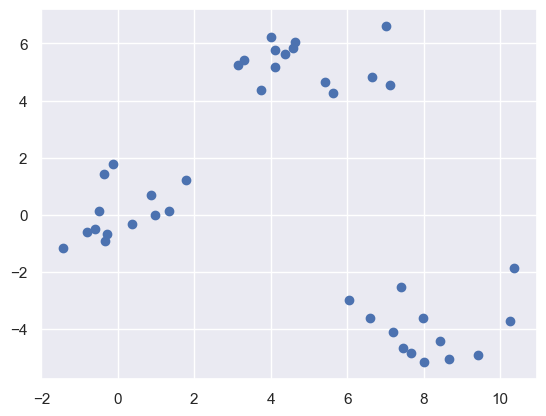

In [328]:
means = np.array([[0,0],
                  [5,5],
                  [8, -4]])
widths = np.array([1, 1, 1])
num_gaussians = len(means)
num_data_pts = 40
dim = None # TODO: currently not relevant to sampling code

X = gaussian_sample(dim, num_gaussians, means, widths, num_data_pts=num_data_pts)
plt.scatter(X[:,0], X[:,1])

# Testing Clustering Algorithms on spherical Gaussian data
K-Means, K-Medians, Single-Linkage Clustering, and Spectral Clustering 

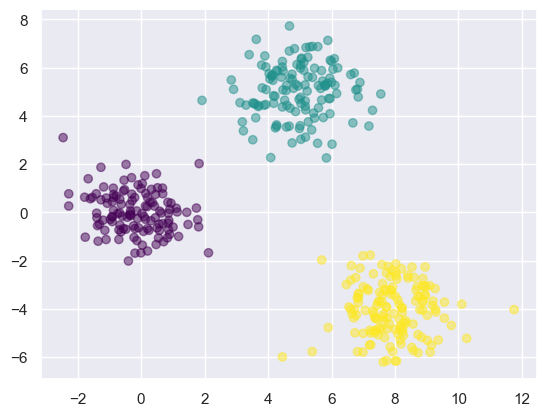

In [5]:
# testing k-medians on Gaussian data
kmedians = KMedians(X, metric=euclidean_dist)
kmedians.fit(k=3)

cluster_assignements = [cluster[0] for cluster in kmedians.assignments]
plt.scatter(X[:,0], X[:,1], c=cluster_assignements, alpha=0.5, cmap='viridis')

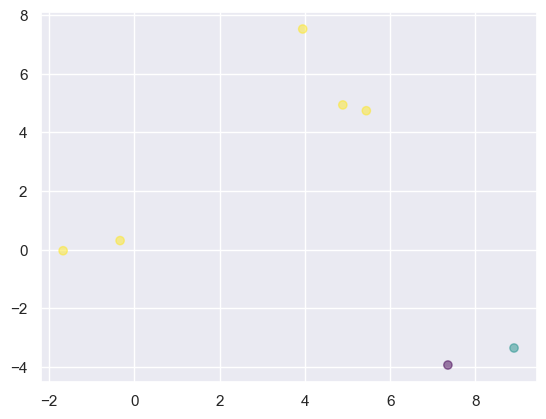

In [49]:
# testing k-means on Gaussian data
kmeans = KMeans(X, metric=euclidean_dist)
kmeans.fit(k=3)

cluster_assignements = [cluster[0] for cluster in kmeans.assignments]
plt.scatter(X[:,0], X[:,1], c=cluster_assignements, alpha=0.5, cmap='viridis')

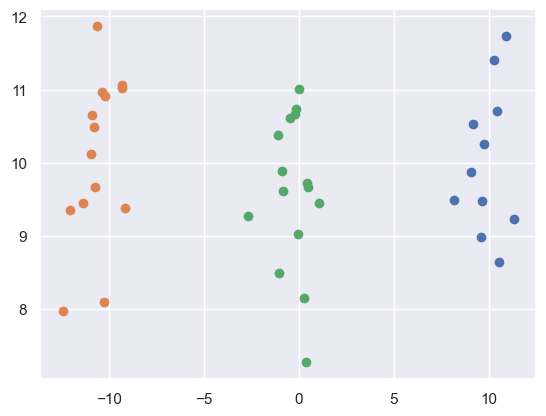

In [320]:
single_linkage = SingleLinkage(X, metric=euclidean_dist)
single_linkage.fit()

k = 3
idx = num_data_pts - k
for cluster in single_linkage.dendrogram[idx]:
    x = [data_pt[0] for data_pt in cluster]
    y = [data_pt[1] for data_pt in cluster]
    plt.scatter(x, y)
plt.show()

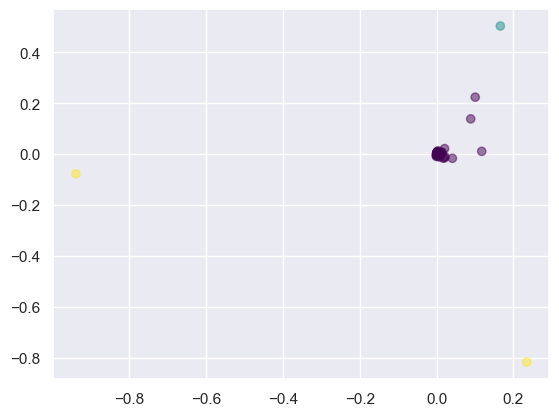

In [289]:
spectral_clustering = SpectralClustering(X, metric=euclidean_dist, similarity_method='rbf')
Y = spectral_clustering.fit(k=3)

kmeans2 = KMeans(Y, metric=euclidean_dist)
kmeans2.fit(k=3)

cluster_assignements = [cluster[0] for cluster in kmeans2.assignments]
plt.scatter(Y[:,0], Y[:,1], c=cluster_assignements, alpha=0.5, cmap='viridis')

# HW 1 Questions

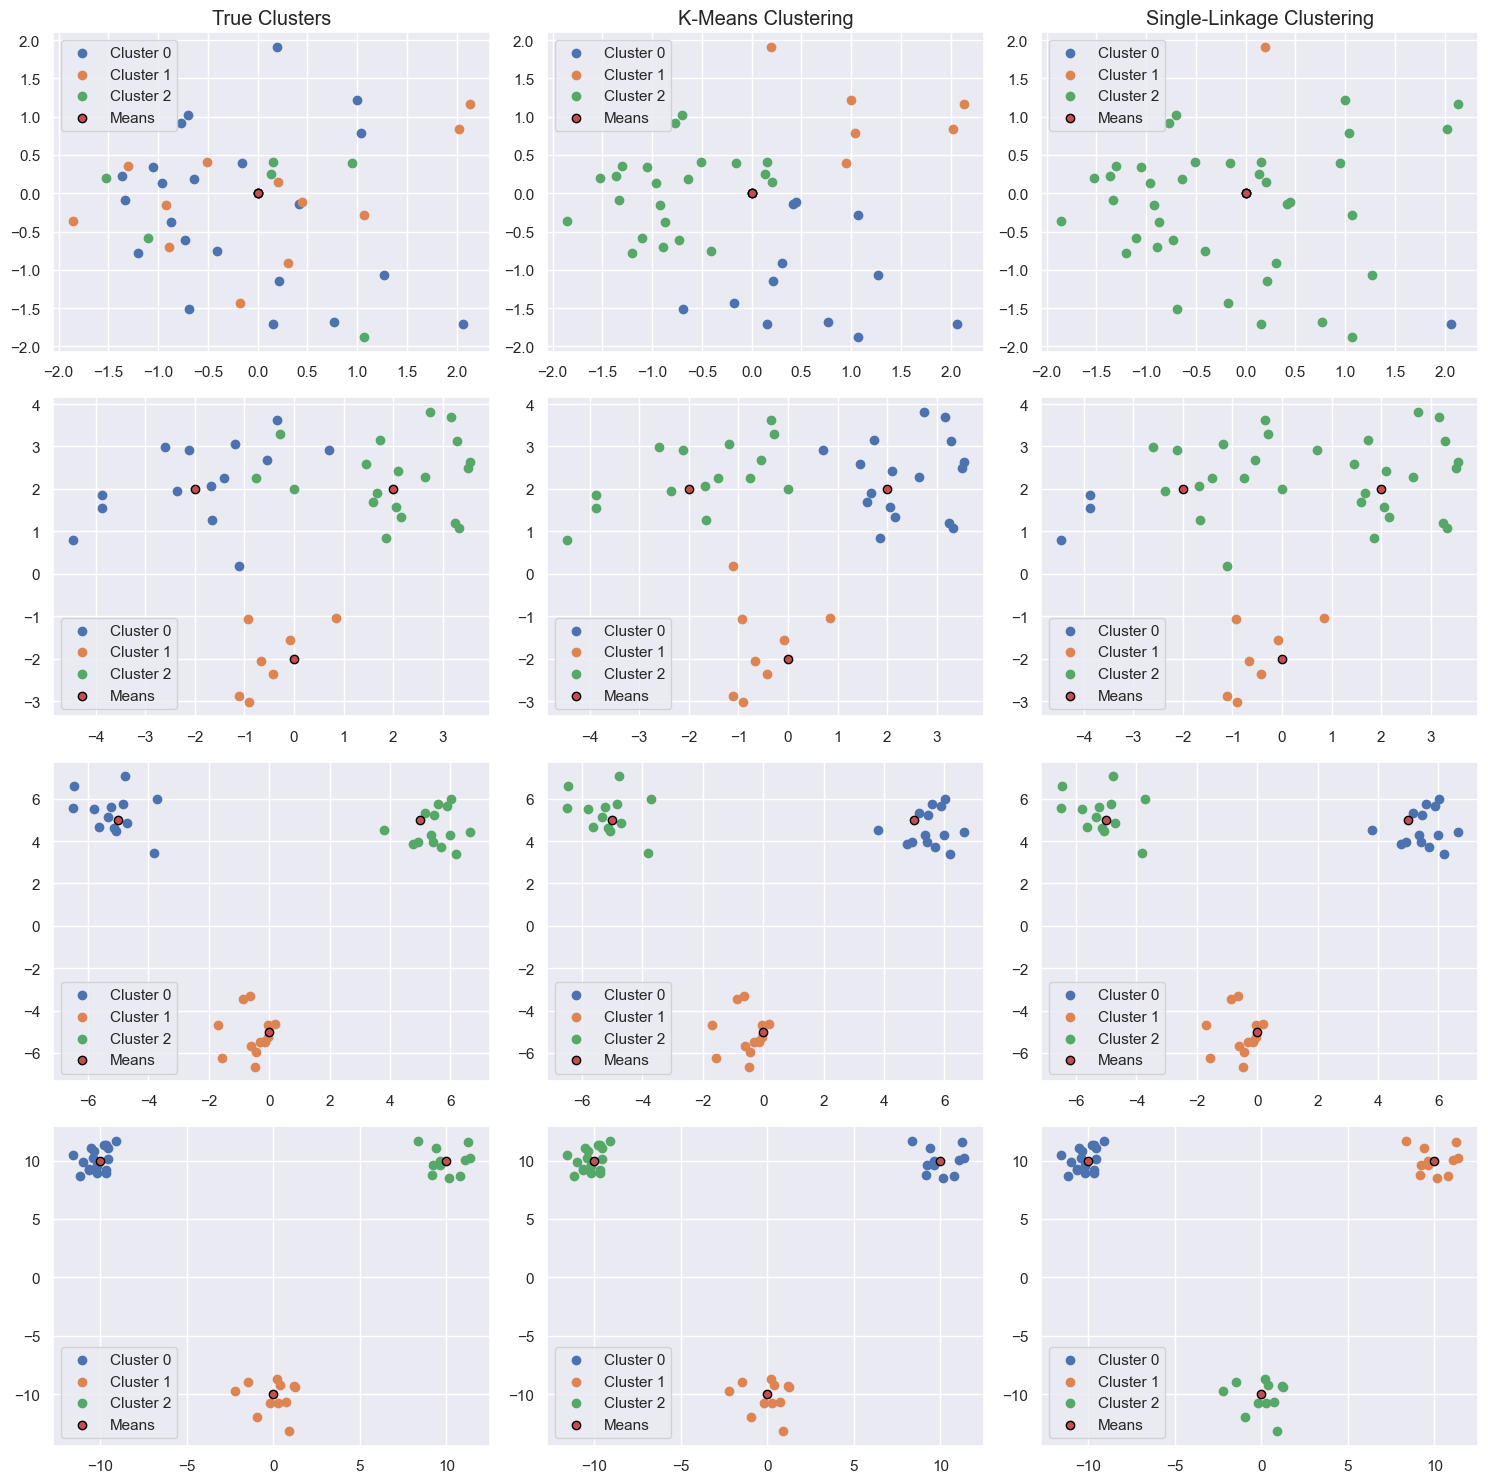

In [370]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# parameters to generate data
means_list = [np.array([[0,0], [0,0], [0, 0]]),
              np.array([[-2,2], [0,-2], [2, 2]]),
              np.array([[-5,5], [0,-5], [5, 5]]),
              np.array([[-10,10], [0,-10], [10, 10]])]              
widths = np.array([1, 1, 1])
num_gaussians = len(means)
num_data_pts = 40
dim = None # TODO: currently not relevant to sampling code

# iterate over Gaussians with varying means
for i, ax in enumerate(axes):
    # generate data and plot it
    X = gaussian_sample(dim, num_gaussians, means_list[i], widths, num_data_pts=num_data_pts, ax=ax[0])
    
    # kmeans clustering and plotting
    kmeans = KMeans(X, metric=euclidean_dist)
    kmeans.fit(k=3)
    
    cluster_assignements = [cluster[0] for cluster in kmeans.assignments]
    for j in range(k):
        x = [X[idx,0] for idx, el in enumerate(cluster_assignements) if el == j]
        y = [X[idx,1] for idx, el in enumerate(cluster_assignements) if el == j]
        ax[1].scatter(x, y, label=f'Cluster {j}')
    ax[1].scatter(means_list[i][:, 0], means_list[i][:, 1], c='r', edgecolors='black', label='Means')
    ax[1].legend()
    
    # single linkage clustering and plotting
    single_linkage = SingleLinkage(X, metric=euclidean_dist)
    single_linkage.fit()

    k = 3
    idx = num_data_pts - k
    for j, cluster in enumerate(single_linkage.dendrogram[idx]):
        x = [data_pt[0] for data_pt in cluster]
        y = [data_pt[1] for data_pt in cluster]
        ax[2].scatter(x, y, label=f'Cluster {j}')
    ax[2].scatter(means_list[i][:, 0], means_list[i][:, 1], c='r', edgecolors='black', label='Means')
    ax[2].legend()
    
    # plot titles of columns
    if i == 0:
        ax[0].set_title('True Clusters', size='large')
        ax[1].set_title('K-Means Clustering', size='large')
        ax[2].set_title('Single-Linkage Clustering', size='large')

# plotting code
fig.tight_layout()
fname = os.path.join(save_path, 'q1/kmeans_singlelinkage.png')
plt.savefig(fname)
plt.show()

# HW 1 Dataset

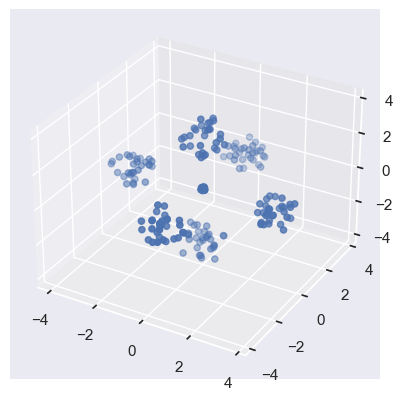

In [182]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])

7 [0 1 2 3 4 5 6] [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


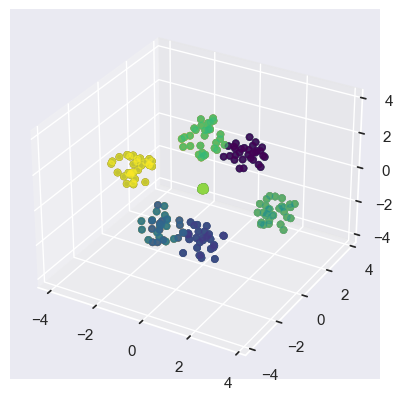

In [282]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

fname = os.path.join(data_path, 'ps1-clustering.txt')
X = np.loadtxt(fname, delimiter='\t', usecols=(1,2,3))
for k in range(1, 8):
    kmeans = KMeans(X, k, euclidean_dist)
    kmeans.fit()
    
    cluster_assignements = [cluster[0] for cluster in kmeans.assignments]
    # if k == 7: print(k, np.unique(cluster_assignements), cluster_assignements)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=cluster_assignements, alpha=0.5, cmap='viridis')
    
    